# Ручная настройка

In [2]:
import numpy as np
import pytesseract
import cv2
from PIL import Image
from matplotlib import pyplot as plt
from glob import glob

pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract.exe'

In [104]:
path = 'C:/Users/Anastasia/Documents/MY/PROJECTS/справки/deg_docs/test/*'
paths = sorted(glob(path))
img_path = paths[0]

In [105]:
def show(image, path=0, show=1):
    if path == 1:
        img = Image.open(image)
    else:
        image = cv2.convertScaleAbs(image)
        img = Image.fromarray(image)
    
    string = pytesseract.image_to_string(img, lang='rus')
    print('len:', len(string))
    print(string)
    
    if show == 1:
        plt.figure(figsize=(15, 15))
        plt.imshow(img)
        plt.show()

len: 525
о 29, 2709

`Отьаткя зил кров (плазмы, «лоток «ров

Дата

т

Е

№. 27 ЗА
3

2

Коты

[2106 2019

кд (68)

пд (68].

129.08 2019

пл (68)

30092019

пуд (68)

25102020 | пд (а)

07112019

"пгуд (бе)

96112020 | пмд (68)

[02122018

"пли (65).

[20.01.2020]

пгуд (68)

5082021 | пуд (69)

2503:2021 | плд(б®) | 600
6%

ГГпмаея |

27.03.2020

плуд (68)

13.05.2020

‘плуд (68)

19.07 2021 | пуд (в)

25052021 | пд (68) | 600.

о

052020

‘оли 68) |

0.072020]

Г ппу (68)

19082021 [пд (68)
14102021 | пмд(6в)

д 69)

абныя 2




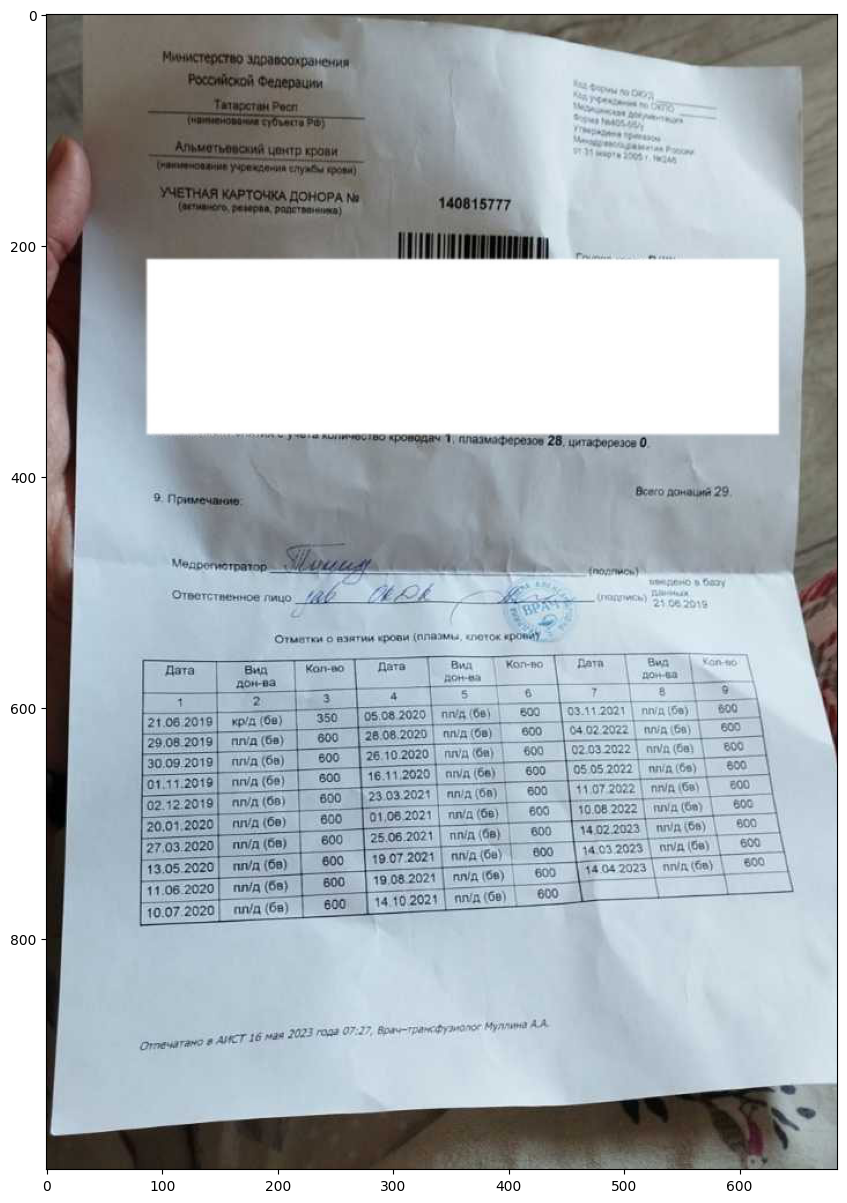

In [106]:
show(img_path, path=1)

## Эксперименты
### № 1 

In [53]:
image = cv2.imread(img_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
dist = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)
dist = cv2.normalize(dist, dist, 0, 1.0, cv2.NORM_MINMAX)
dist = (dist * 255).astype("uint8")
dist = cv2.threshold(dist, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

len: 0



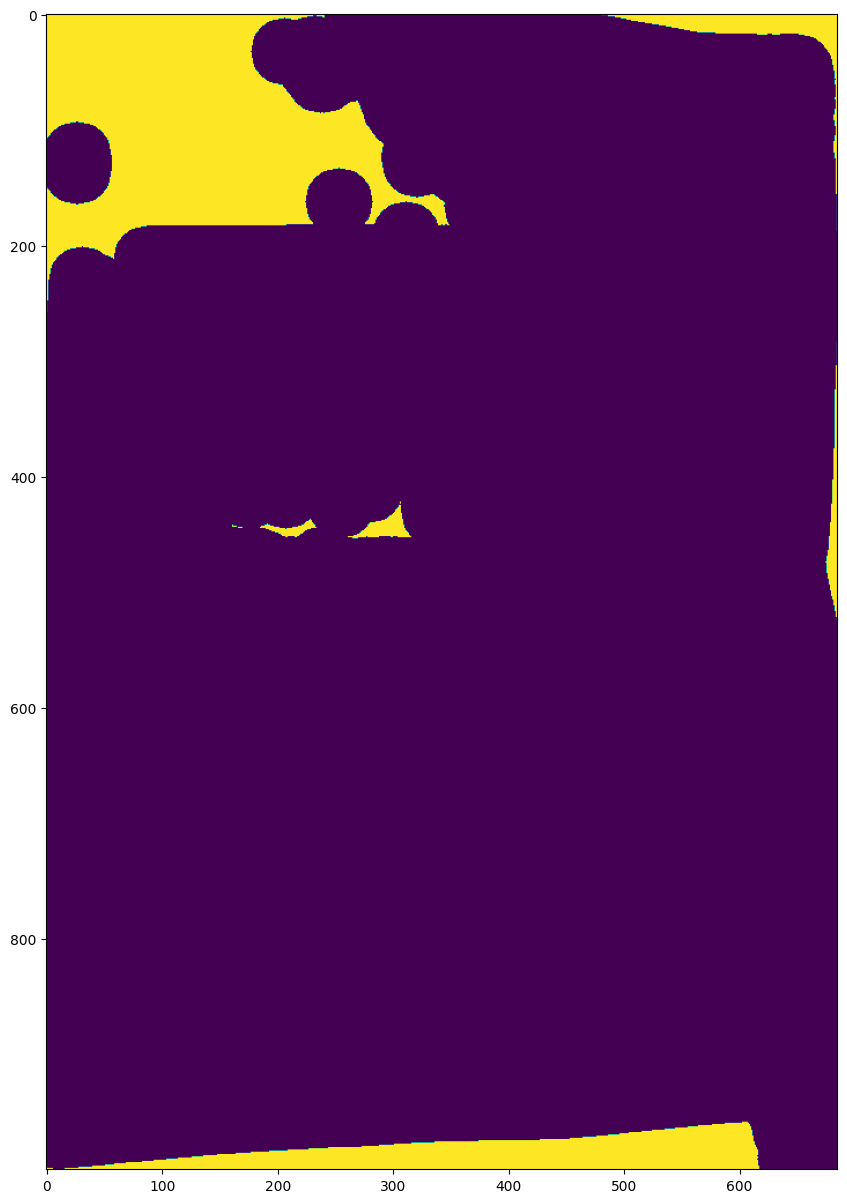

In [54]:
show(dist)

### № 2

In [55]:
blurred = cv2.GaussianBlur(image, (5, 5), 0)
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
threshold = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
sobelx = cv2.Sobel(threshold, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(threshold, cv2.CV_64F, 0, 1, ksize=3)
edges = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)
kernel = np.ones((5,5),np.uint8)
morph = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

len: 0



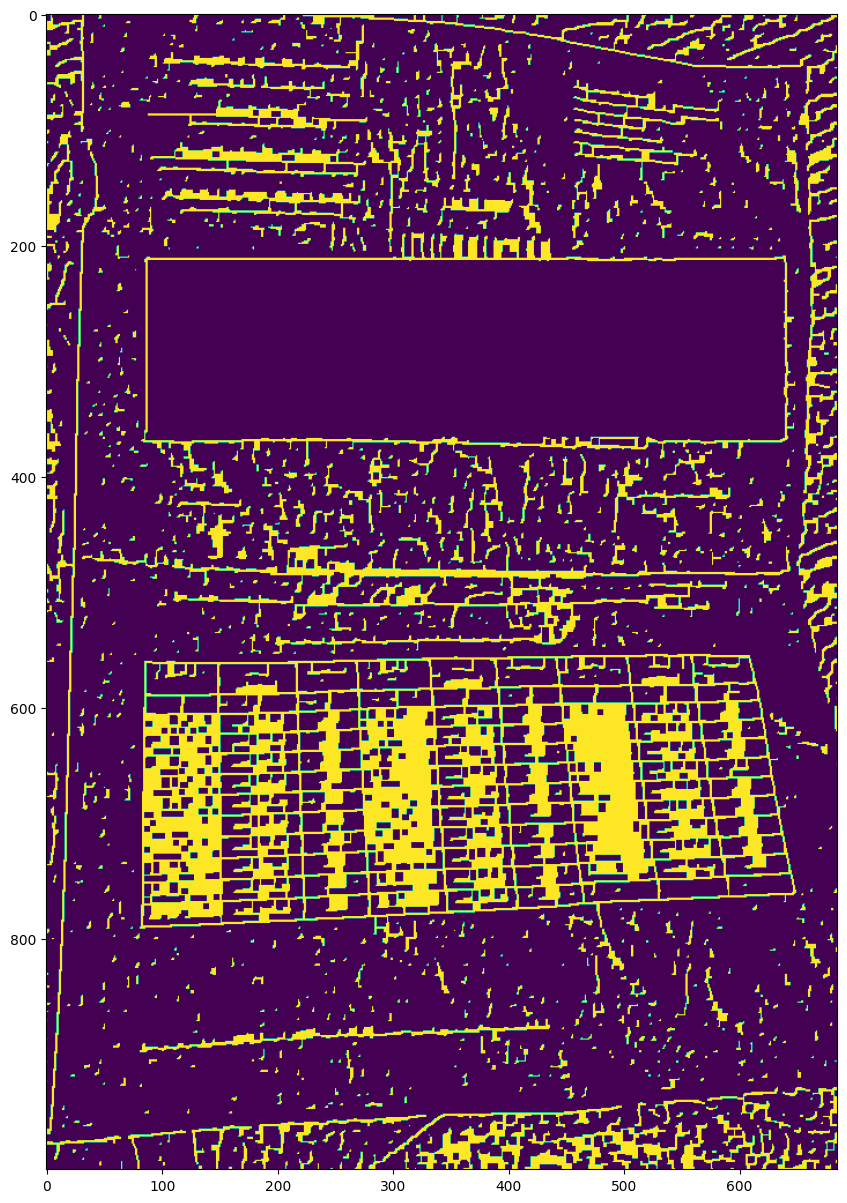

In [56]:
show(morph)

### № 3

In [57]:
lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
l_channel, a, b = cv2.split(lab)

clahe = cv2.createCLAHE(clipLimit=1.6, tileGridSize=(1,1))
cl = clahe.apply(l_channel)

limg = cv2.merge((cl, a, b))
enhanced_img = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
filtered = cv2.bilateralFilter(enhanced_img,9,75,75)

len: 681
Ооъоттюолио ДИ ОХ
ы :

Дата

"отвез ров (плазмы, «лоток ро

Е
:

то

вид
ежа

Котто

т

О

—

5

21.08.2019

05582020

|| ппу (68)

лат | пабы

29.08.2019

28082020

пуд 68) |

04.0225 [ плод6а) |

30092019

25102020

д 64) |

02032022 | оу (6в |

[61112019

161112020)

од (68) |

055.202 Гуд)

С

[02:92:2019

28032021

“плод |

91972622 | пи (68) |

С

[20.01.2020

01082621

(69) |

За | моде |

Е:

[27.03.2020

25082021

тд (69) |

пара | мч |

Е

18.05.2020 |

19072021

‘под (6)

а азаааа >

4522025 | 96%)

80

11.08-2020

19082024

олд 68)

05

9804-2023 им 68) |

10072020)

ЗЕЕ а ЗЕ

14102021

д (60)

6.

мая Ото О
неа РАНГА НЫ 205

5.27, врнстранефумоло Мрплино АА,




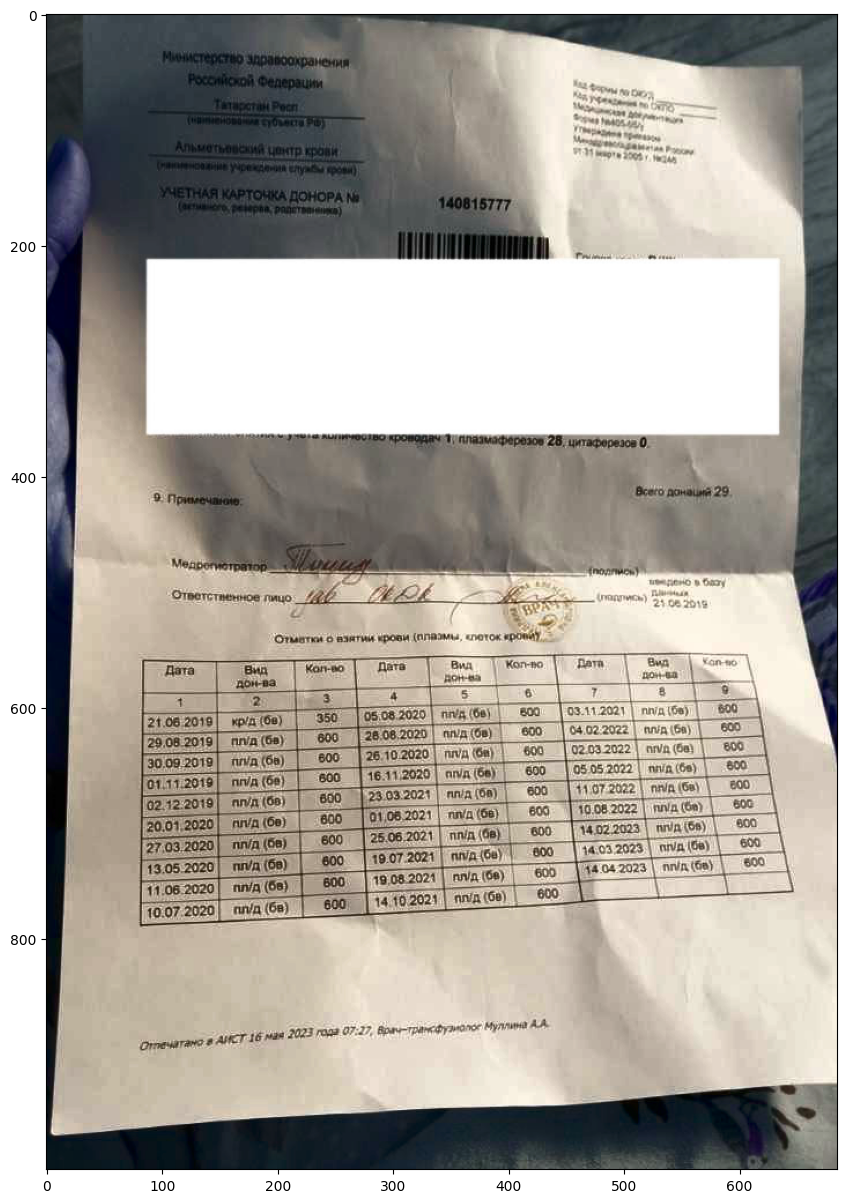

In [58]:
show(enhanced_img)

len: 493
:
убазояю
[29.08 2019.
Бобототю
ВЕСЫ
БЕН
ЕЕ
2709205
13052000
1152020
10.07 2020.

О :
ыы —
`28.08.2020 | пид (68) 164022622 | плид (68)
26102020 [ под а] 6232022 | пм (бу
16.11.2020 | пгуд (68). "0505 2022 | пуд (68) | 60
23032021 [ пма(69) ААС
пе пм 68) о [ово | па | 60 _

25.06.2021 [ пил (68) 18.52.2023 [ муд (6) [| 805
19.07 2021 [ пмд (66) | 6% |14:032523 од 68) | 6%
тов 202 пд вю) | 600 еб | мм | 99
14102621 | пм (69) [8% |

эл | паев)

заваааааа а - 1

2. вок. трачдузноно Муту АА




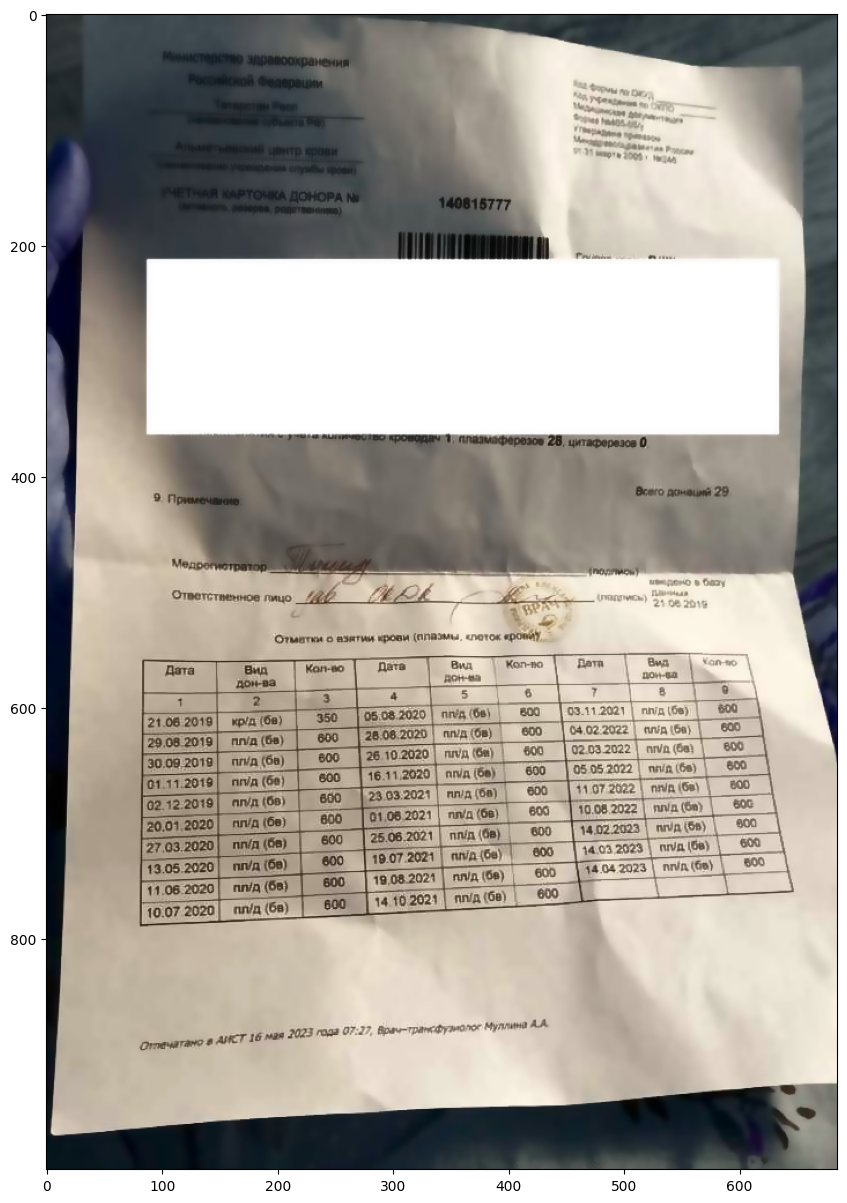

In [59]:
show(filtered)

### № 4

In [67]:
kernel = np.array([[-1,-1,-1], 
                   [-1, 9,-1],
                   [-1,-1,-1]])

sharpened_image = cv2.filter2D(enhanced_img, -1, kernel)

len: 14
и
Ы
приложив




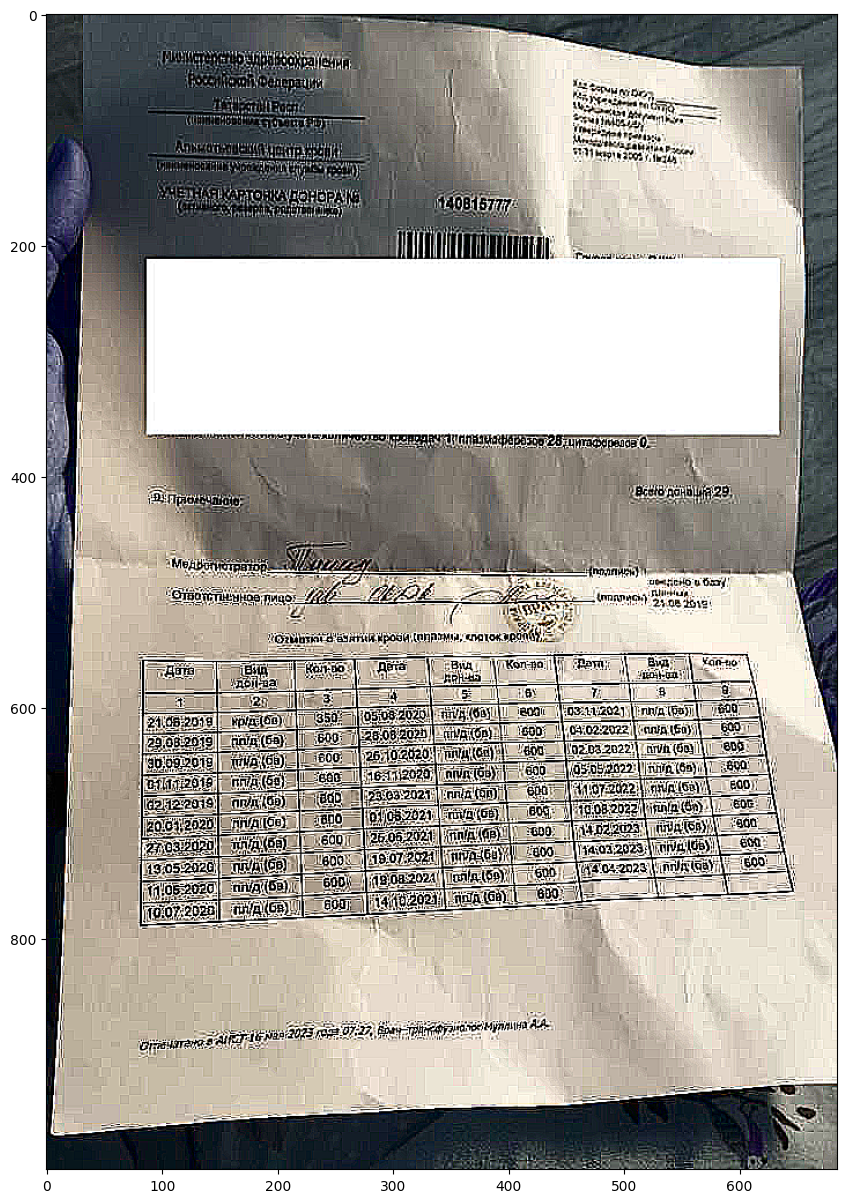

In [68]:
show(sharpened_image)

### № 5

In [60]:
image_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
y, cr, cb = cv2.split(image_yuv)
y = cv2.add(y, 50)
image_yuv = cv2.merge((y, cr, cb))
result_image = cv2.cvtColor(image_yuv, cv2.COLOR_YCrCb2BGR)

len: 359
пот лиоворно проводим 1 плазмабферено 28 литидерено 0
‹ %

Веыо роны 29.

донсва
Гтовзоте] абы) | 355 [65082080]
[29582619[ пля(ве) | во [260820 |
30092019] пла (68) | 600 [26102020
Ото [ пд (69) | 600 |
ЗЕЕ
20012020
27032020] има (68)
[13.05.2020] пимд(69)
91.2020 | пуд (68)
10072025 | па

пп (68)
[15072021 | пд (6%) |
19.08.2021 | пм

14102021 | пмд(69)




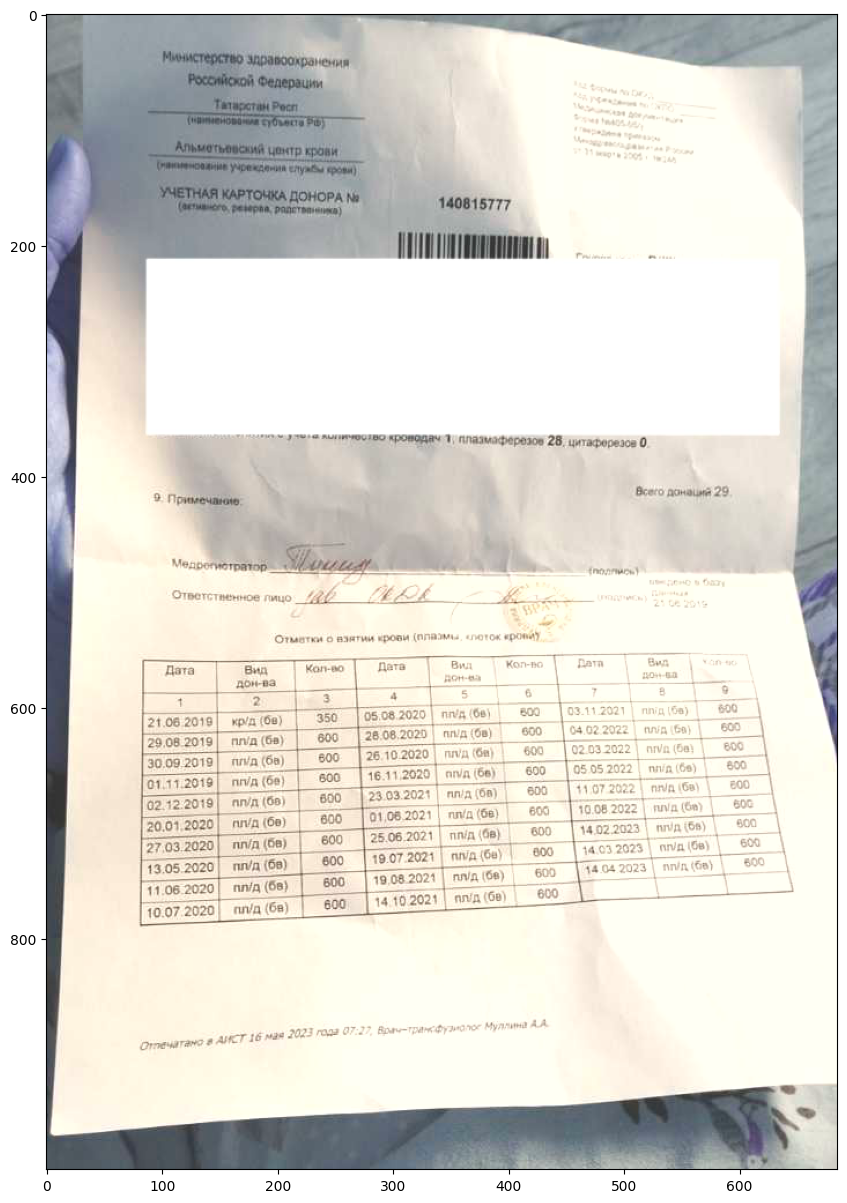

In [61]:
show(result_image)

### № 6

In [62]:
binary = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
binary = cv2.bitwise_not(binary)
kernel = np.ones((5,5),np.uint8)
dilated = cv2.dilate(binary, kernel, iterations = 1)

len: 0



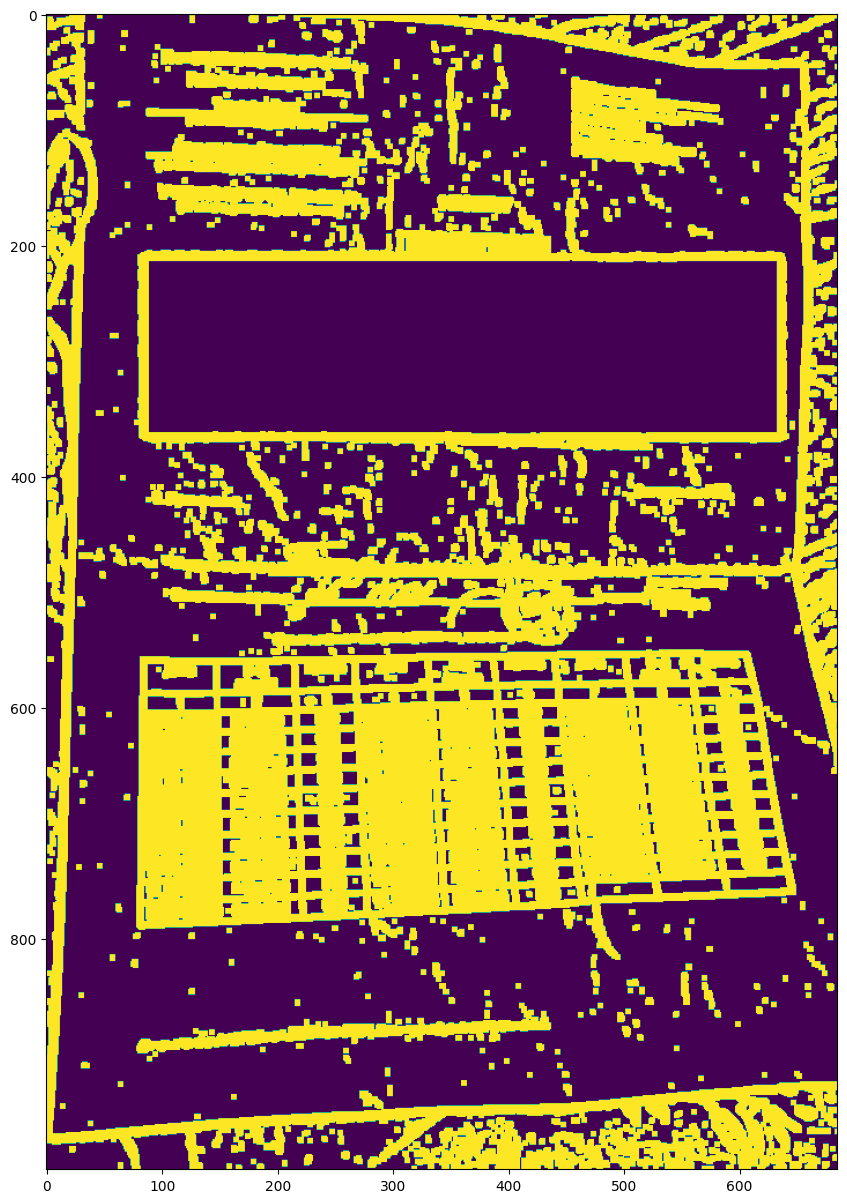

In [63]:
show(dilated)

### № 7

In [82]:
class TableExtractor:

    def __init__(self, image_path):
        self.image_path = image_path

    def execute(self):
        self.read_image()
        self.convert_image_to_grayscale()
        self.threshold_image()
        self.invert_image()
        self.dilate_image()
        self.find_contours()
        self.filter_contours_and_leave_only_rectangles()
        self.find_largest_contour_by_area()
        self.order_points_in_the_contour_with_max_area()
        self.calculate_new_width_and_height_of_image()
        self.apply_perspective_transform()
        self.add_10_percent_padding()
        return self.perspective_corrected_image_with_padding

    def read_image(self):
        self.image = Image.open(self.image_path)
        self.image = np.array(self.image)

    def convert_image_to_grayscale(self):
        self.grayscale_image = cv2.cvtColor(self.image, cv2.COLOR_BGR2GRAY)

    def blur_image(self):
        self.blurred_image = cv2.blur(self.grayscale_image, (5, 5))

    def threshold_image(self):
        self.thresholded_image = cv2.threshold(self.grayscale_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

    def invert_image(self):
        self.inverted_image = cv2.bitwise_not(self.thresholded_image)

    def dilate_image(self):
        self.dilated_image = cv2.dilate(self.inverted_image, None, iterations=5)

    def find_contours(self):
        self.contours, self.hierarchy = cv2.findContours(self.dilated_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        self.image_with_all_contours = self.image.copy()
        cv2.drawContours(self.image_with_all_contours, self.contours, -1, (0, 255, 0), 3)

    def filter_contours_and_leave_only_rectangles(self):
        self.rectangular_contours = []
        for contour in self.contours:
            peri = cv2.arcLength(contour, True)
            approx = cv2.approxPolyDP(contour, 0.02 * peri, True)
            if len(approx) == 4:
                self.rectangular_contours.append(approx)
        self.image_with_only_rectangular_contours = self.image.copy()
        cv2.drawContours(self.image_with_only_rectangular_contours, self.rectangular_contours, -1, (0, 255, 0), 3)

    def find_largest_contour_by_area(self):
        max_area = 0
        self.contour_with_max_area = None
        for contour in self.rectangular_contours:
            area = cv2.contourArea(contour)
            if area > max_area:
                max_area = area
                self.contour_with_max_area = contour
        self.image_with_contour_with_max_area = self.image.copy()
        cv2.drawContours(self.image_with_contour_with_max_area, [self.contour_with_max_area], -1, (0, 255, 0), 3)

    def order_points_in_the_contour_with_max_area(self):
        self.contour_with_max_area_ordered = self.order_points(self.contour_with_max_area)
        self.image_with_points_plotted = self.image.copy()
        for point in self.contour_with_max_area_ordered:
            point_coordinates = (int(point[0]), int(point[1]))
            self.image_with_points_plotted = cv2.circle(self.image_with_points_plotted, point_coordinates, 10, (0, 0, 255), -1)

    def calculate_new_width_and_height_of_image(self):
        existing_image_width = self.image.shape[1]
        existing_image_width_reduced_by_10_percent = int(existing_image_width * 0.9)
        
        distance_between_top_left_and_top_right = self.calculateDistanceBetween2Points(self.contour_with_max_area_ordered[0], self.contour_with_max_area_ordered[1])
        distance_between_top_left_and_bottom_left = self.calculateDistanceBetween2Points(self.contour_with_max_area_ordered[0], self.contour_with_max_area_ordered[3])

        aspect_ratio = distance_between_top_left_and_bottom_left / distance_between_top_left_and_top_right

        self.new_image_width = existing_image_width_reduced_by_10_percent
        self.new_image_height = int(self.new_image_width * aspect_ratio)

    def apply_perspective_transform(self):
        pts1 = np.float32(self.contour_with_max_area_ordered)
        pts2 = np.float32([[0, 0], [self.new_image_width, 0], [self.new_image_width, self.new_image_height], [0, self.new_image_height]])
        matrix = cv2.getPerspectiveTransform(pts1, pts2)
        self.perspective_corrected_image = cv2.warpPerspective(self.image, matrix, (self.new_image_width, self.new_image_height))

    def add_10_percent_padding(self):
        image_height = self.image.shape[0]
        padding = int(image_height * 0.1)
        self.perspective_corrected_image_with_padding = cv2.copyMakeBorder(self.perspective_corrected_image, padding, padding, padding, padding, cv2.BORDER_CONSTANT, value=[255, 255, 255])

    def draw_contours(self):
        self.image_with_contours = self.image.copy()
        cv2.drawContours(self.image_with_contours,  [ self.contour_with_max_area ], -1, (0, 255, 0), 1)

    def calculateDistanceBetween2Points(self, p1, p2):
        dis = ((p2[0] - p1[0]) ** 2 + (p2[1] - p1[1]) ** 2) ** 0.5
        return dis
    
    def order_points(self, pts):
        # initialzie a list of coordinates that will be ordered
        # such that the first entry in the list is the top-left,
        # the second entry is the top-right, the third is the
        # bottom-right, and the fourth is the bottom-left
        pts = pts.reshape(4, 2)
        rect = np.zeros((4, 2), dtype="float32")

        # the top-left point will have the smallest sum, whereas
        # the bottom-right point will have the largest sum
        s = pts.sum(axis=1)
        rect[0] = pts[np.argmin(s)]
        rect[2] = pts[np.argmax(s)]

        # now, compute the difference between the points, the
        # top-right point will have the smallest difference,
        # whereas the bottom-left will have the largest difference
        diff = np.diff(pts, axis=1)
        rect[1] = pts[np.argmin(diff)]
        rect[3] = pts[np.argmax(diff)]

        # return the ordered coordinates
        return rect

In [85]:
te = TableExtractor(img_path)
result = te.execute()

len: 0



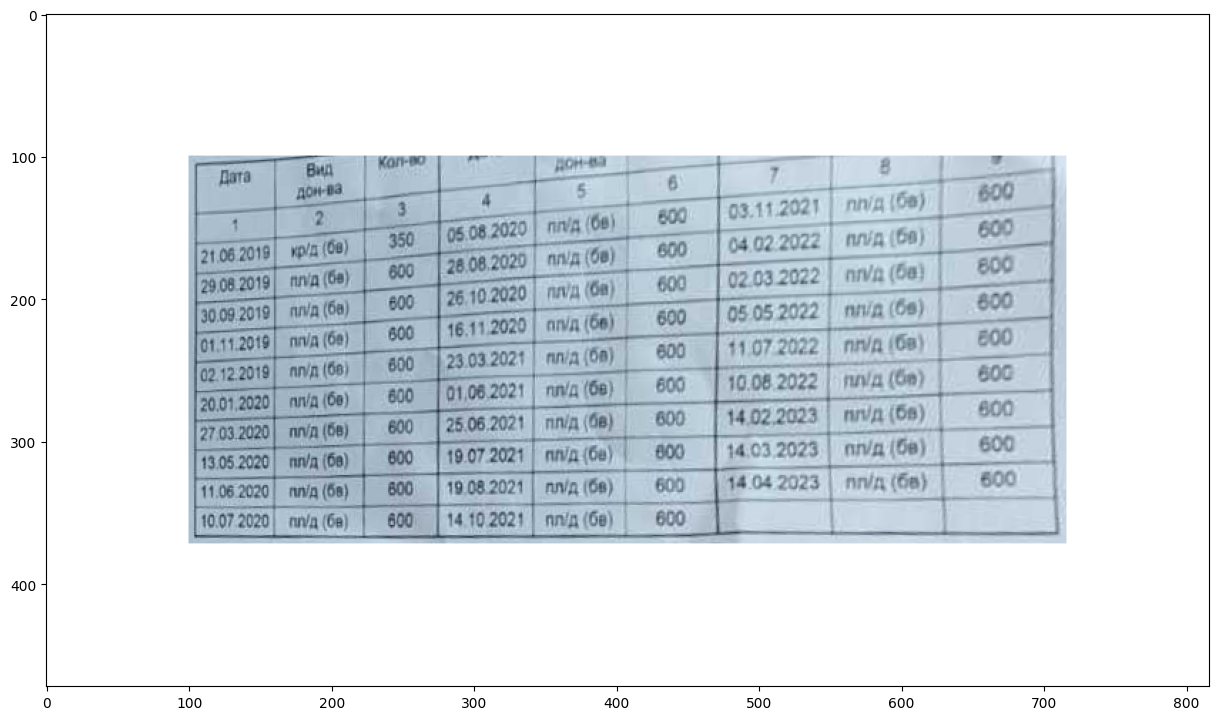

In [87]:
show(result)

<div style="border:solid steelblue 5px; padding: 30px">
<p>
        <b>Лучшие результаты показал способ № 3, проверим его на других изображениях.</b>
    </p>  
</div>

## Проверка

In [100]:
def enhance_img(img_path):
    img = Image.open(img_path)
    img = np.array(img)
    
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l_channel, a, b = cv2.split(lab)

    clahe = cv2.createCLAHE(clipLimit=1.6, tileGridSize=(1,1))
    cl = clahe.apply(l_channel)

    limg = cv2.merge((cl, a, b))
    enhanced_img = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
    
    print('\n', img_path, '\n')
    show(img, show=0)
    show(enhanced_img, show=0)

In [101]:
for path in paths:
    enhance_img(path)


 C:/Users/Anastasia/Documents/MY/PROJECTS/справки/deg_docs/test\141899 .jpg 

len: 456
Дата

т
215662019 | жд (68) 105582020 | п (68)

[29082019 | плуд(6е) "26062020 | пуд (6)

30092018] ииуд (68) 26102020 | пд)

От 11.2019 | пп (68) 61712020 [ ауд)

[0292-2019] пм (69), 23032021 | плд(68) | 800

[20.01.2020] пуд (68) 60 [61062521 | пмд(68) | 6% лм) |
27032020[ пм (6) 25052021 [пд (68) |600 2) |
13052020] ппу (68) 15072021 | пмд (в) | 8%

052020 [ плул(68) | 1908 ее 160

0.07.2020 | плйд (68) 302021 | пуд (68) |__60.

стана 2023 то 072


len: 681
`Отьвтьй зим ров (плазмы, «лоток орон

Е
:

то

т

О

вид
дожа

Котто

21.68.2019

—

5

05582020
28082020

968

5311252 | лудп6е) |

пуд 68 |

[61112019

25102020

д 64) |

02032022 | оу (6в |

[02:92:2019

163112020)

од (68) |

$
С:
4.022252 | влц6а) | 695
Е
С

055.202 уд)

28032021

“плод |

91972622 | пик (68) | 600

[20.01.2020
[27.03.2020

01082621

туд (69) |

Зоо | пуд(ва) 60

25082021

тд (69) |

О
а
о
С
600
сз
1609
го
С:

714.52202

len: 1159
ини. х Но Код формы по ОКУД
и терство здразеоханения Код учреждения по ОКПО 42664323

Российской Федерации Медицинская документация
Форма №405-05/у
Хабаровский край Утверждена приказом.
Минздравсоцразвития России
(наименование субъекта РФ) от31 марта 2005" №246
КГБУЗ «КСПК»
(наименование учреждения службы крови)
УЧЕТНАЯ КАРТОЧКА ДОНОРА № 163046

(активного, резерва, родственника)

Группа крови А(1!)

хули я чиилечиво кроводач 1, плазмаферезов у, цитаферезов 0.

Всего донаций 13.
9. Примечание:

Медрегистратор (подпись)
введено в базу
Ответственное лицо (подпись) Данных

14.02.2006

Отметки о взятии крови (плазмы, клеток крови)

Дата Вид

дон-ва

1 2 з
14.02.2006 | кр/д (бв) 420
11.06.2014 | кр/д(бв) 350
30.10.2014 | кр/д(6в) 450
13.08.2015 | кр/д(бв) 450
30.10.2015 | крид(6в) 450

Дата Вид

дон-ва

а 6
15.07.2016 | кр/д(6в) | 450
11.10.2016 | кр/д (6в) | 450
21.12.2016 | круд (6в) | 450
21.06.2017 | круд(6в) | 450

Дата Вид

_\ дон-ва
* 8 9

04.08.2018 | кр/д (бв) 450
26.12.2


 C:/Users/Anastasia/Documents/MY/PROJECTS/справки/deg_docs/test\245365 .jpg 

len: 0

len: 425
›егистратор (подпись)

к гр введено в базу

в’ (подпись) 14.01.2009

Отметки о взятии крови (плазмы, клеток крови)

дон-ва
он ЕСИ
к (65
И

3
370
_ 450
| 450
_ 450

450

12. _ 250
21.11.2016 | 200
| 23.12.2016 | | 70 | 16.07.2018 | пл/д (бв)

=

12.10.2022

т) 2 и п п >
02 214 а оо р вн
„м р > й Г |7 ЗЕ Я П &!-
| 201 пл/Л 2 я | ‘ ) ЕТ:
мА )

.201

7 печатано в АМТ ТА ира 97: 5 А У
лечатано в АИСТ 14 марта’ 2023 года 10:0



 C:/Users/Anastasia/Documents/MY/PROJECTS/справки/deg_docs/test\254586 .jpg 

len: 992
Министерство здравоохранения
Российской Федерации

‚Хабаровский хрвй
траинованяю 9

КГБУЗ «КСПК»
Пвуенование учреждения спужбы 1рови)

УЧЕТНАЯ КАРТОЧКА ДОНОРА №

тер)

“активного резерв, рдетвенииа)

100312292

ИИ

Код формы по ОКУД,
Код рижан
Медицинская роументация

"зориз оз-ОЕЙ/
Учберидена гричамом

Мыодравсочрозантия Росси

т рмарть 205 №240

Группа крови А(И)

‘охоте

Резус-фектор 

<div style="border:solid steelblue 5px; padding: 30px">
<p>
        <b>Ручная настройка подошла не всем изображениям, стоит попробовать более адаптивные методы.</b>
    </p>  
</div>